In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [58]:
data = pd.read_csv("/content/sample_data/US_Accidents_Dec21_updated.csv")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [59]:
data.shape

(2575987, 47)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575987 entries, 0 to 2575986
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [43]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [44]:
data.isnull().values.sum()

2777712

In [45]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1532357
Street                         2
Side                           0
City                         126
County                         0
State                          0
Zipcode                     1062
Country                        0
Timezone                    3107
Airport_Code                8671
Weather_Timestamp          46264
Temperature(F)             62570
Wind_Chill(F)             306364
Humidity(%)                66163
Pressure(in)               52862
Visibility(mi)             62762
Wind_Direction             68412
Wind_Speed(mph)           118615
Precipitation(in)         374330
Weather_Condition          62614
Amenity   

In [46]:
data.nunique()


ID                       2575987
Severity                       4
Start_Time               1737416
End_Time                 2126759
Start_Lat                1011770
Start_Lng                1035063
End_Lat                   999253
End_Lng                  1020396
Distance(mi)               13607
Description              1094519
Number                     44898
Street                    154777
Side                           3
City                       11247
County                      1665
State                         49
Zipcode                   346083
Country                        1
Timezone                       4
Airport_Code                1972
Weather_Timestamp         377525
Temperature(F)               757
Wind_Chill(F)                877
Humidity(%)                  100
Pressure(in)                1054
Visibility(mi)                74
Wind_Direction                24
Wind_Speed(mph)              129
Precipitation(in)            223
Weather_Condition            121
Amenity   

In [47]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.575987e+06,2.575987e+06,2.575987e+06,2.575987e+06,2.575987e+06,2.575987e+06,1.043630e+06,2.513417e+06,2.269623e+06,2.509824e+06,2.523125e+06,2.513225e+06,2.457372e+06,2.201657e+06
mean,2.101080e+00,3.609510e+01,-9.709378e+01,3.609524e+01,-9.709353e+01,7.024682e-01,7.934174e+03,6.150205e+01,5.979954e+01,6.450236e+01,2.944794e+01,9.073033e+00,7.285690e+00,6.475327e-03
std,4.262010e-01,5.357662e+00,1.832295e+01,5.357767e+00,1.832275e+01,1.543113e+00,1.540598e+04,1.863931e+01,2.094982e+01,2.285548e+01,1.042365e+00,2.661484e+00,5.572093e+00,8.084692e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,1.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.327407e+01,-1.180307e+02,3.327406e+01,-1.180299e+02,4.800000e-02,1.270000e+03,4.900000e+01,4.700000e+01,4.800000e+01,2.927000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,3.584987e+01,-9.241808e+01,3.585036e+01,-9.241789e+01,2.270000e-01,4.001000e+03,6.300000e+01,6.300000e+01,6.700000e+01,2.980000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.001797e+01,-8.036339e+01,4.001835e+01,-8.036397e+01,7.750000e-01,9.485000e+03,7.600000e+01,7.600000e+01,8.400000e+01,3.000000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.610610e+05,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [48]:
drop_list=[]
feature_list=[]

In [49]:
data[['Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country']]

,Number,Street,Side,City,County,State,Zipcode,Country
0,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US
1,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US
2,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US
3,NaN,I-77 N,R,Akron,Summit,OH,44311,US
4,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US
...,...,...,...,...,...,...,...,...
2575982,NaN,I-78 W,R,Newark,Essex,NJ,07114,US
2575983,NaN,E 177th St,R,Bronx,Bronx,NY,10472,US
2575984,1154.0,Portland Cobalt Rd,L,Portland,Middlesex,CT,06480-1744,US
2575985,1222.0,Portland Cobalt Rd,L,Portland,Middlesex,CT,06480-1744,US


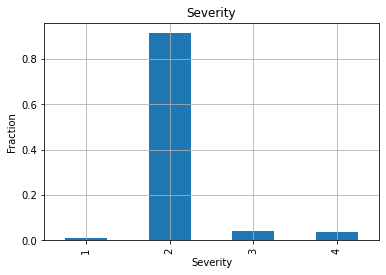

In [53]:
data.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

In [54]:
bool_cols = [col for col in data.columns if data[col].dtype ==np.dtype('bool')]
booldf = data[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(data)))

There are 51931 non one hot metadata rows, which are 2.0% of the data


In [55]:
bools = booldf.sum(axis=0)

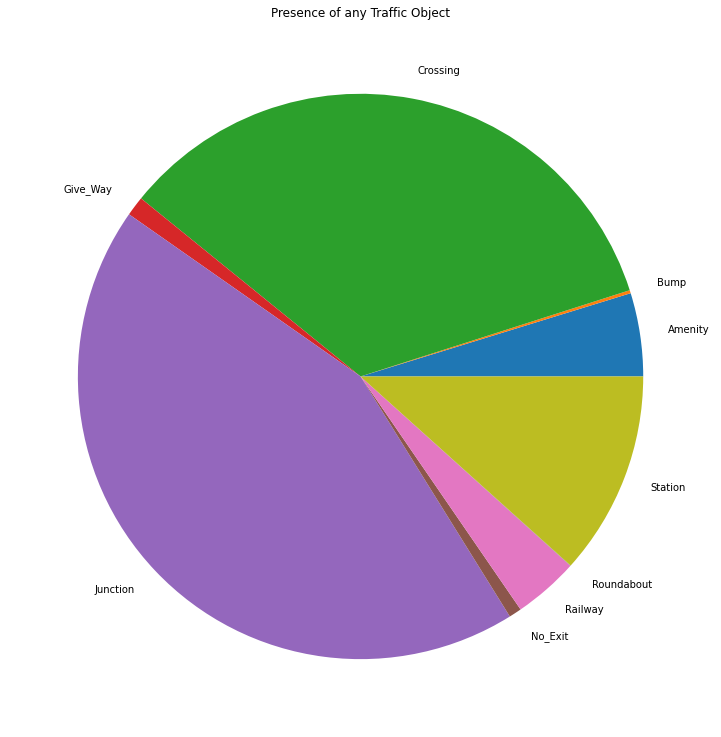

In [56]:
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Presence of any Traffic Object');

In [16]:
start = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(data.End_Time, format='%Y-%m-%d %H:%M:%S')

In [17]:
print(start)

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2575982   2018-11-14 18:00:03
2575983   2018-11-14 17:58:23
2575984   2018-11-14 18:16:23
2575985   2018-11-14 18:16:23
2575986   2018-11-14 18:24:00
Name: Start_Time, Length: 2575987, dtype: datetime64[ns]


In [18]:
print(end)

0         2016-02-08 06:37:08
1         2016-02-08 11:56:20
2         2016-02-08 12:15:39
3         2016-02-08 12:51:45
4         2016-02-08 13:53:43
                  ...        
2575982   2018-11-14 18:29:57
2575983   2018-11-14 18:28:17
2575984   2018-11-14 18:45:54
2575985   2018-11-14 18:45:54
2575986   2018-11-14 21:00:00
Name: End_Time, Length: 2575987, dtype: datetime64[ns]


In [19]:
print(end-start)

0         0 days 06:00:00
1         0 days 06:00:00
2         0 days 06:00:00
3         0 days 06:00:00
4         0 days 06:00:00
                ...      
2575982   0 days 00:29:54
2575983   0 days 00:29:54
2575984   0 days 00:29:31
2575985   0 days 00:29:31
2575986   0 days 02:36:00
Length: 2575987, dtype: timedelta64[ns]


top 20 accident durations correspond to 38.0% of the data


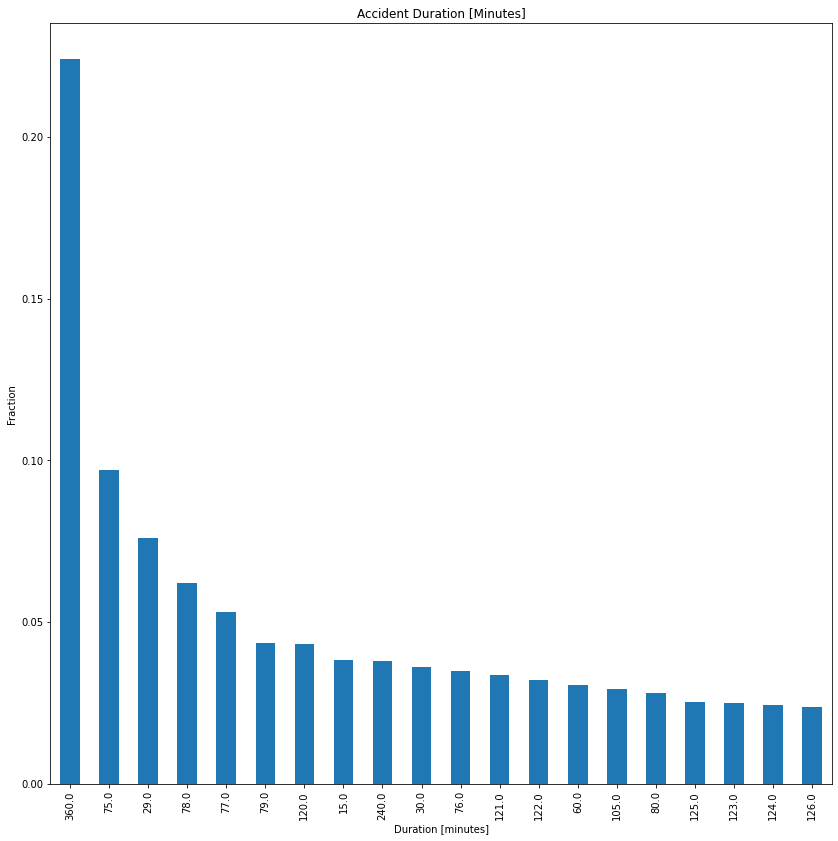

In [20]:
diff = (end-start)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

In [21]:
data['time'] = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S')
data = data.set_index('time')
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 05:56:20,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:15:39,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:51:45,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
2016-02-08 07:53:43,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """


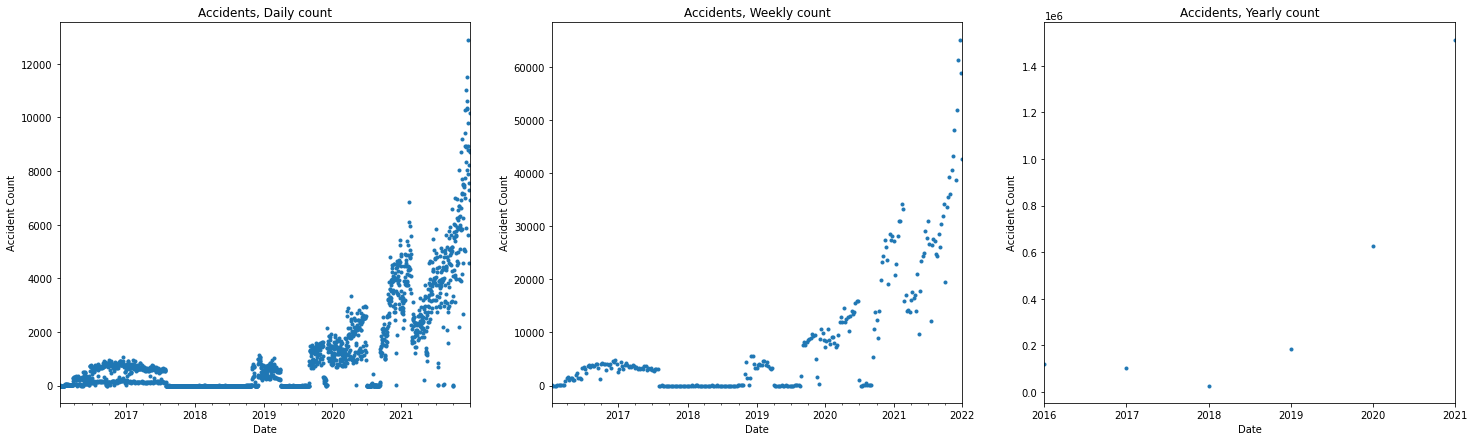

In [22]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(25,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = data.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

In [23]:
daa = data
daa.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1532357
Street                         2
Side                           0
City                         126
County                         0
State                          0
Zipcode                     1062
Country                        0
Timezone                    3107
Airport_Code                8671
Weather_Timestamp          46264
Temperature(F)             62570
Wind_Chill(F)             306364
Humidity(%)                66163
Pressure(in)               52862
Visibility(mi)             62762
Wind_Direction             68412
Wind_Speed(mph)           118615
Precipitation(in)         374330
Weather_Condition          62614
Amenity   

In [24]:
missing_percent = daa.isna().sum().sort_values(ascending = False)/len(data)
missing_percent

Number                   5.948621e-01
Precipitation(in)        1.453152e-01
Wind_Chill(F)            1.189307e-01
Wind_Speed(mph)          4.604643e-02
Wind_Direction           2.655759e-02
Humidity(%)              2.568452e-02
Visibility(mi)           2.436425e-02
Weather_Condition        2.430680e-02
Temperature(F)           2.428972e-02
Pressure(in)             2.052107e-02
Weather_Timestamp        1.795972e-02
Airport_Code             3.366088e-03
Timezone                 1.206140e-03
Nautical_Twilight        1.109089e-03
Civil_Twilight           1.109089e-03
Sunrise_Sunset           1.109089e-03
Astronomical_Twilight    1.109089e-03
Zipcode                  4.122692e-04
City                     4.891329e-05
Street                   7.764014e-07
Turning_Loop             3.882007e-07
Traffic_Signal           3.882007e-07
Traffic_Calming          3.882007e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time    

In [25]:
missing_percent[missing_percent != 0]

Number                   5.948621e-01
Precipitation(in)        1.453152e-01
Wind_Chill(F)            1.189307e-01
Wind_Speed(mph)          4.604643e-02
Wind_Direction           2.655759e-02
Humidity(%)              2.568452e-02
Visibility(mi)           2.436425e-02
Weather_Condition        2.430680e-02
Temperature(F)           2.428972e-02
Pressure(in)             2.052107e-02
Weather_Timestamp        1.795972e-02
Airport_Code             3.366088e-03
Timezone                 1.206140e-03
Nautical_Twilight        1.109089e-03
Civil_Twilight           1.109089e-03
Sunrise_Sunset           1.109089e-03
Astronomical_Twilight    1.109089e-03
Zipcode                  4.122692e-04
City                     4.891329e-05
Street                   7.764014e-07
Turning_Loop             3.882007e-07
Traffic_Signal           3.882007e-07
Traffic_Calming          3.882007e-07
dtype: float64

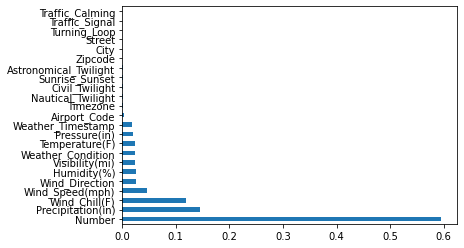

In [26]:
missing_percent[missing_percent != 0].plot(kind = 'barh')

In [27]:
daa['Street'].nunique()

154777

In [28]:
doo = daa.drop(['ID','Distance(mi)', 'Start_Time', 'End_Time','Number', 'Timezone','Weather_Timestamp', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code',
'Start_Lat',	'Start_Lng', 	'End_Lat',	'End_Lng', 'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight' ], axis=1)

In [29]:
doo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2575987 entries, 2016-02-08 00:37:08 to 2018-11-14 18:24:00
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Temperature(F)     float64
 2   Wind_Chill(F)      float64
 3   Humidity(%)        float64
 4   Pressure(in)       float64
 5   Visibility(mi)     float64
 6   Wind_Direction     object 
 7   Wind_Speed(mph)    float64
 8   Precipitation(in)  float64
 9   Weather_Condition  object 
 10  Amenity            bool   
 11  Bump               bool   
 12  Crossing           bool   
 13  Give_Way           bool   
 14  Junction           bool   
 15  No_Exit            bool   
 16  Railway            bool   
 17  Roundabout         bool   
 18  Station            bool   
 19  Stop               object 
 20  Traffic_Calming    object 
 21  Traffic_Signal     object 
 22  Turning_Loop       object 
 23  Sunrise_Sunset     object 
dtypes: bool(9), float

In [30]:
doo.head(5)

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,...,False,False,False,False,False,False,False,False,False,Night
2016-02-08 05:56:20,2,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,...,False,False,False,False,False,False,False,False,False,Night
2016-02-08 06:15:39,2,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,...,True,False,False,False,False,False,False,False,False,Night
2016-02-08 06:51:45,2,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,...,False,False,False,False,False,False,False,False,False,Night
2016-02-08 07:53:43,3,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,...,False,False,False,False,False,False,False,False,False,Day


In [31]:
doo.isnull().sum()

Severity                  0
Temperature(F)        62570
Wind_Chill(F)        306364
Humidity(%)           66163
Pressure(in)          52862
Visibility(mi)        62762
Wind_Direction        68412
Wind_Speed(mph)      118615
Precipitation(in)    374330
Weather_Condition     62614
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           1
Traffic_Signal            1
Turning_Loop              1
Sunrise_Sunset         2857
dtype: int64

In [32]:
pmean = doo['Pressure(in)'].mean()
tmean = doo['Temperature(F)'].mean()
wcmean = doo['Wind_Chill(F)'].mean()
hmean = doo['Humidity(%)'].mean()
wsmean = doo['Wind_Speed(mph)'].mean()
prmean = doo['Precipitation(in)'].mean()

In [33]:
doo['Pressure(in)']=doo['Pressure(in)'].fillna(pmean)
doo['Temperature(F)'] = doo['Temperature(F)'].fillna(tmean)
doo['Wind_Chill(F)'] = doo['Wind_Chill(F)'].fillna(wcmean)
doo['Humidity(%)'] = doo['Humidity(%)'].fillna(hmean)
doo['Wind_Speed(mph)'] = doo['Wind_Speed(mph)'].fillna(wsmean)
doo['Precipitation(in)']=doo['Precipitation(in)'].fillna(prmean)

In [34]:
doo.isnull().sum()

Severity                 0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       62762
Wind_Direction       68412
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    62614
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          1
Traffic_Signal           1
Turning_Loop             1
Sunrise_Sunset        2857
dtype: int64

In [35]:
doo['Visibility(mi)'] = doo['Visibility(mi)'].fillna(doo['Visibility(mi)'].mode()[0])
doo['Wind_Direction'] = doo['Wind_Direction'].fillna(doo['Wind_Direction'].mode()[0])
doo['Weather_Condition'] = doo['Weather_Condition'].fillna(doo['Weather_Condition'].mode()[0])
doo['Sunrise_Sunset'] = doo['Sunrise_Sunset'].fillna(doo['Sunrise_Sunset'].mode()[0])


In [36]:
doo.isnull().sum()

Severity             0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      1
Traffic_Signal       1
Turning_Loop         1
Sunrise_Sunset       0
dtype: int64

In [37]:
df1=doo

In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()

TypeError: ignored

In [ ]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1.head()

In [ ]:
sev = df1['Severity']

In [ ]:
new = df1.drop(['Severity'], axis = 1)

In [ ]:
new.head(5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(doo)

In [ ]:
data_rescaled

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [ ]:
reduced